Tarea 2: Ciencia de datos

Arquieta Cortez Mauricio Marcial

In [33]:
#Primero importamos las librerias necesarias
import numpy as np
from IPython.core.display import Image, display
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,8

In [34]:
#Importamos el conjunto de datos a utilizar, en este caso sera el de la flor de Iris
data = pd.read_csv("Iris.csv")

¿Cuáles son nuestros datos?

In [35]:
#Imprimimos los primeros renglones del dataset
data1 = data
#eliminamos la columna Id que es el identificador de phyton
data2 = data1.drop(["Id"],1)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


En la tabla anterior observamos los datos que incluye el dataset, los datos son referentes al largo y ancho del Sepalo y petalo de 3 especies diferentes de Flor Iris.

In [36]:
#ultimas filas del dataset
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [37]:
#filas intermedas del dataset
data[50:55]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


¿Qué conocemos de nuestros datos?

In [38]:
#Información del dataset
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


El dataset consiste en la informacion del sepalo y petalo de la flor iris, en total son 150 muestras, las primeras 4 columnas incluyen datos numericos (tanto variables continuas como discretas) mientras que la columna de "Species" consiste en datos categoricos, que representan el tipo de especie de cada fila. Observamos que no hay valores nulos, es decir, los datos estan completos, no hay datos faltantes.

In [39]:
data["Species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [40]:
data["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

De lo anterior observamos que hay 3 variables categoricas con 50 muestras cada una.

In [41]:
#Resumen estadistico de nuestros datos
data2.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En la tabla anterior observamos la mediana de cada dato, se observa una medida de su variacion (std), y los datos mínimo y máximo de cada columna.

Un poco de probabilidades.

35

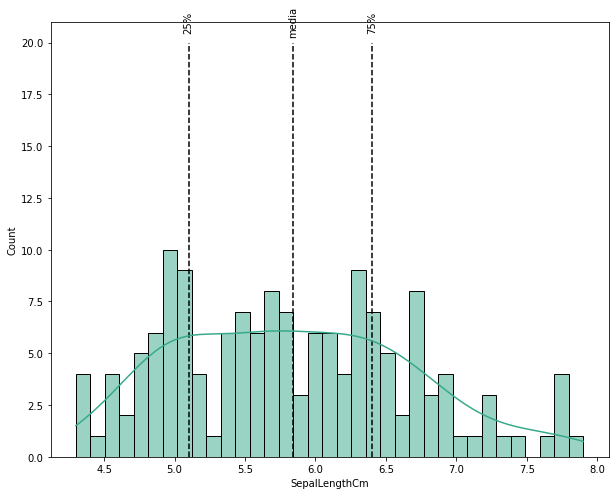

In [42]:
sns.histplot(data=data, x="SepalLengthCm", kde=True, bins=len(data["SepalLengthCm"].value_counts()), discrete=False, color='#36a98b')
plt.vlines(5.843333, 0,20, color='black', linestyle='--')
plt.text(5.843333, 21, 'media', ha='center', va='center',rotation='vertical')
plt.vlines(5.100000, 0,20, color='black', linestyle='--')
plt.text(5.100000, 21, '25%', ha='center', va='center',rotation='vertical')
plt.vlines(6.400000, 0,20, color='black', linestyle='--')
plt.text(6.400000, 21, '75%', ha='center', va='center',rotation='vertical');
len(data["SepalLengthCm"].value_counts())

23

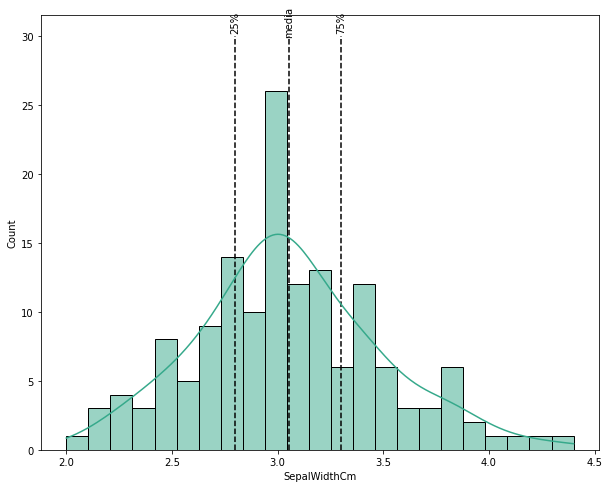

In [43]:
sns.histplot(data=data, x="SepalWidthCm", kde=True, bins=len(data["SepalWidthCm"].value_counts()), discrete=False, color='#36a98b')
plt.vlines(3.054, 0,30, color='black', linestyle='--')
plt.text(3.054, 31, 'media', ha='center', va='center',rotation='vertical')
plt.vlines(2.8, 0,30, color='black', linestyle='--')
plt.text(2.8, 31, '25%', ha='center', va='center',rotation='vertical')
plt.vlines(3.3, 0,30, color='black', linestyle='--')
plt.text(3.3, 31, '75%', ha='center', va='center',rotation='vertical');
len(data["SepalWidthCm"].value_counts())

43

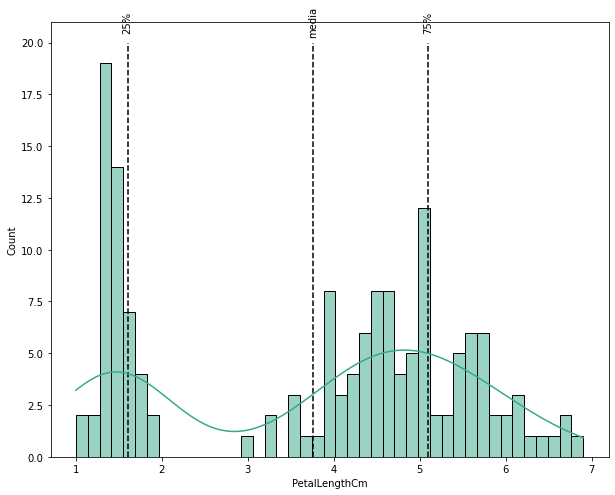

In [44]:
sns.histplot(data=data, x="PetalLengthCm", kde=True, bins=len(data["PetalLengthCm"].value_counts()), discrete=False, color='#36a98b')
plt.vlines(3.758667, 0,20, color='black', linestyle='--')
plt.text(3.758667, 21, 'media', ha='center', va='center',rotation='vertical')
plt.vlines(1.6, 0,20, color='black', linestyle='--')
plt.text(1.6, 21, '25%', ha='center', va='center',rotation='vertical')
plt.vlines(5.1, 0,20, color='black', linestyle='--')
plt.text(5.1, 21, '75%', ha='center', va='center',rotation='vertical');
len(data["PetalLengthCm"].value_counts())

22

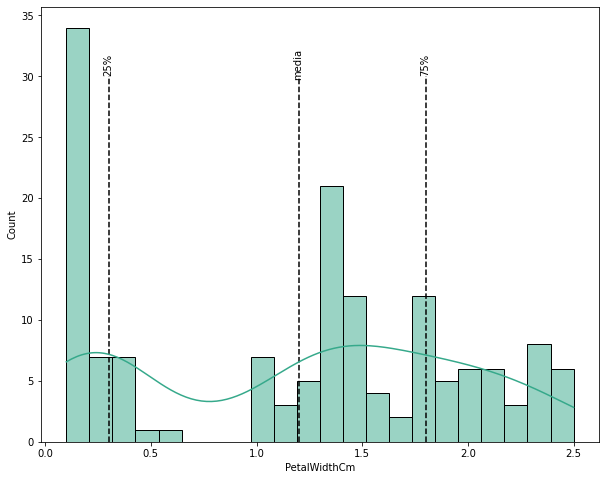

In [45]:
sns.histplot(data=data, x="PetalWidthCm", kde=True, bins=len(data["PetalWidthCm"].value_counts()), discrete=False, color='#36a98b')
plt.vlines(1.198667, 0,30, color='black', linestyle='--')
plt.text(1.198667, 31, 'media', ha='center', va='center',rotation='vertical')
plt.vlines(0.3, 0,30, color='black', linestyle='--')
plt.text(0.3, 31, '25%', ha='center', va='center',rotation='vertical')
plt.vlines(1.8, 0,30, color='black', linestyle='--')
plt.text(1.8, 31, '75%', ha='center', va='center',rotation='vertical');
len(data["PetalWidthCm"].value_counts())

De los histogramas anteriores observamos que el valor más probable para la longitud del petalo es de 5 cm, mientras que para el ancho es de 3 cm. Por otro lado para el petalo el valor mas probable para la longitud es de 1.5 cm y para el ancho es de 0.2 cm.

¿Cuál es la distribución en las variables categoricas?

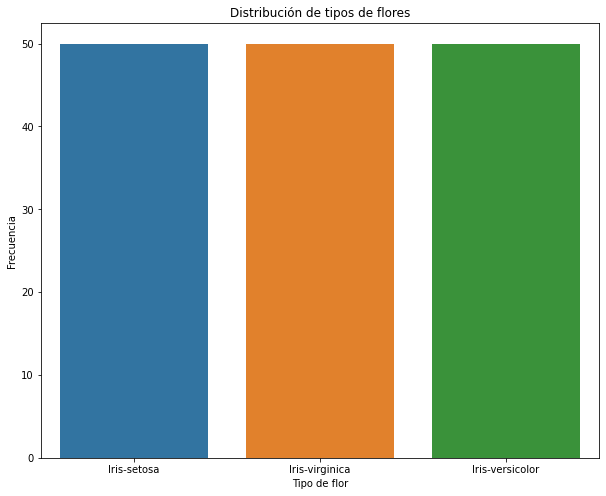

In [46]:
#Muestras por tipo de flor
tipo_flor = data["Species"].value_counts().index
frecuencia = data["Species"].value_counts().values

fig, ax = plt.subplots(figsize = (10,8))
_ = sns.barplot(x = tipo_flor, y = frecuencia)
_ = ax.set_title('Distribución de tipos de flores')
_ = ax.set_xlabel('Tipo de flor')
_ = ax.set_ylabel('Frecuencia')


La gráfica anterior nos muestra lo que ya hemos mencionado, cada tipo de flor tiene 50 muestras.

In [47]:
#Porcentaje de los datos al que corresponde cada tipo de flor
data["Species"].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-virginica     0.333333
Iris-versicolor    0.333333
Name: Species, dtype: float64

¿Qué especie de flor tiene una correcta distribución?

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

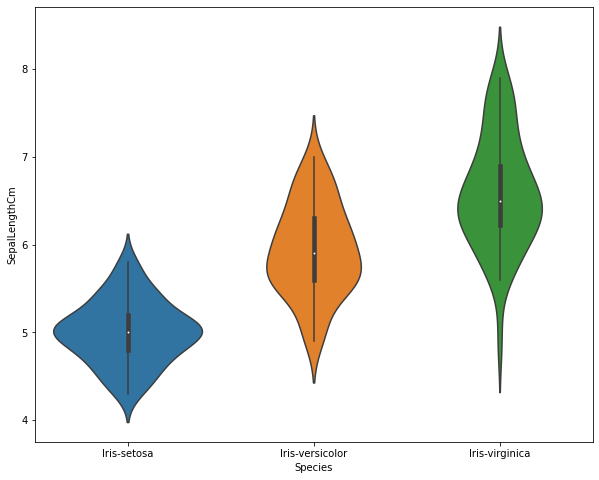

In [48]:
sns.violinplot(data=data1, y="SepalLengthCm", x="Species")

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

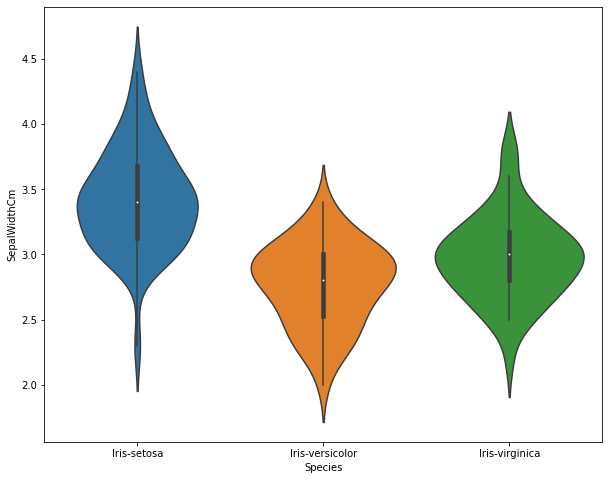

In [49]:
sns.violinplot(data=data1, y="SepalWidthCm", x="Species")

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

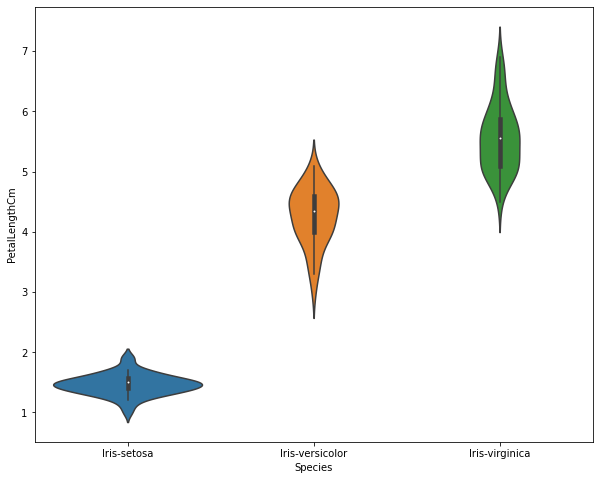

In [50]:
sns.violinplot(data=data1, y="PetalLengthCm", x="Species")

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

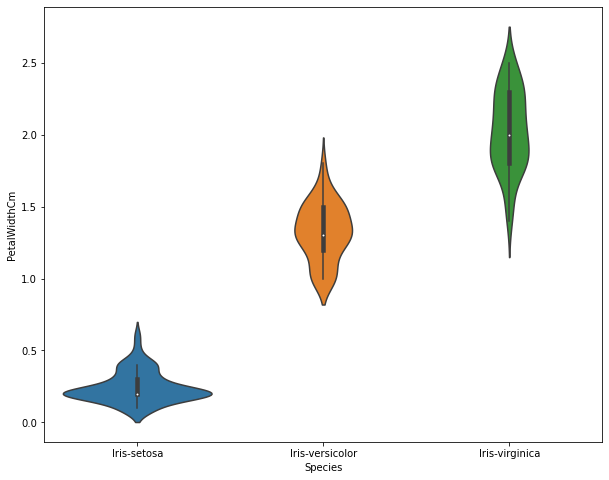

In [51]:
sns.violinplot(data=data1, y="PetalWidthCm", x="Species")

En cualquiera de los casos anteriores la distribución de iris setosa es la que más se acerca a una distribución normal, además al igual que en el histograma podemos observar en donde se encuentran los valores más probables.

In [52]:
from sklearn.preprocessing import LabelEncoder
#transformamos los string a float de los datos categoricos
labelE = LabelEncoder()
data2["Species"] = labelE.fit_transform(data1["Species"])
data2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


¿Hay alguna relación con las mediciones y las especies?

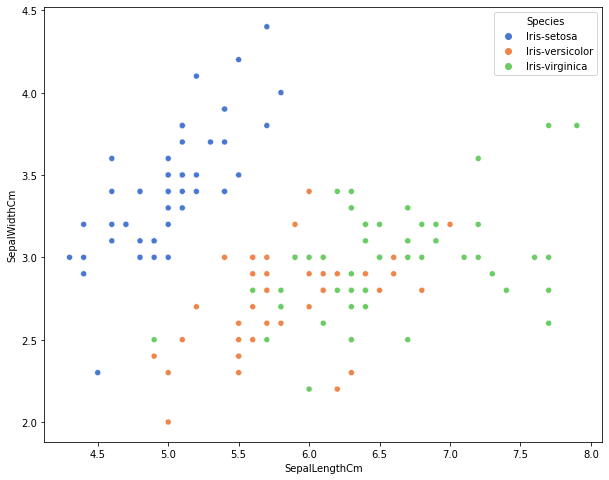

In [53]:
sns.scatterplot(data=data1, x="SepalLengthCm", y="SepalWidthCm", alpha=1, hue="Species", 
    palette="muted", sizes=(40, 100));

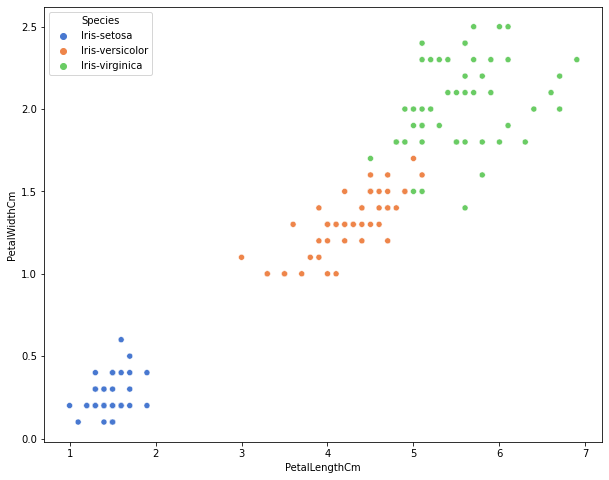

In [54]:
sns.scatterplot(data=data1, x="PetalLengthCm", y="PetalWidthCm", alpha=1, hue="Species", 
    palette="muted", sizes=(40, 100));

De las muestras obtenidas por el dataset observamos que la separación de tipos de iris es claro, aunque se observan datos que se translapan entre ellos. Para un modelo de clasificación podriamos tener problemas con esos datos, ya que en el clustering se confunde los tipos de flor entre la Iris-virginica y la Iris-versicolor ya que presentan caracterisiticas similares tanto en el sepalo como en el petalo.

¿Cuál es la relación entre las variables?

In [55]:
data2.corr(method = "pearson")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


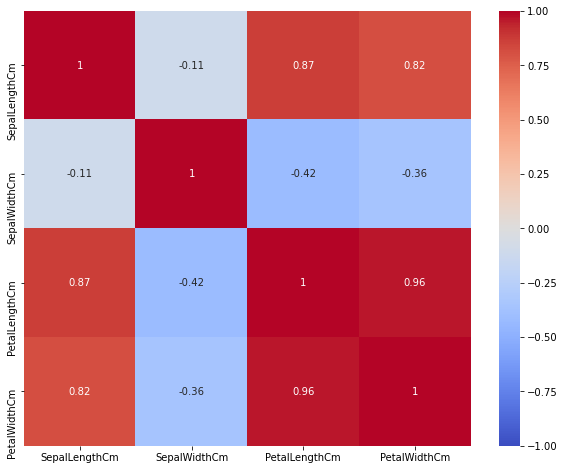

In [56]:
data3 = data2.drop(["Species"],1)
sns.heatmap(data3.corr(method = "pearson"), annot=True, cmap='coolwarm', vmax=1, vmin=-1);

Una vez observada el mapa de correlación de nuestros datos podemos observar que las variables se relacionan mejor entre ellas (consigo misma), mientras que hay otras que no, esto nos permite saber que relación hay entre el ancho y largo del petalo y sepalo, lo cuál podría indicarnos que el crecimiento de una depende del crecimiento de la otra, es decir, el ancho del sepalo no influye en el largo del sepalo mientras que el largo del petalo influye en el crecimiento del petalo y el ancho del petalo influye en el largo del mismo. 

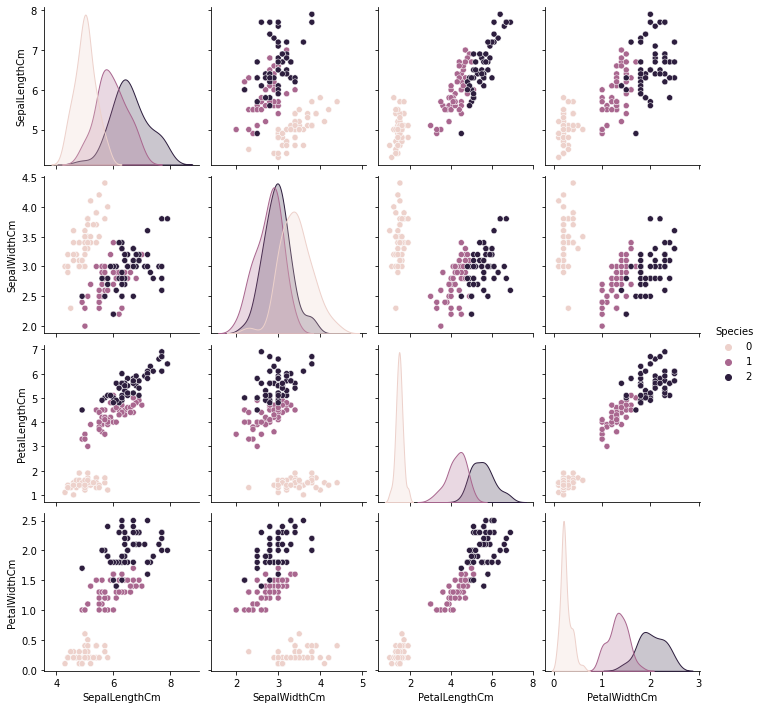

In [57]:
sns.pairplot(data2, hue="Species")